## Preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
import os

# Import and read the charity_data.csv from the provided URL
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
data = application_df.drop(columns=['EIN', 'NAME'])

In [3]:
# Determine the number of unique values in each column
unique_values = data.nunique()

# Display the unique values count for each column
unique_values

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = data['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 500
application_types_to_replace = application_type_counts[application_type_counts < threshold].index
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = data['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = data['CLASSIFICATION'].value_counts()
print(classification_counts[classification_counts > 1])

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
threshold = 1000

# Replace rare CLASSIFICATION values with 'Other'
classifications_to_replace = classification_counts[classification_counts < threshold].index
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df, drop_first=True)

In [10]:
# Select the first 43 features to match the target parameter count
X = application_df_encoded.iloc[:, :43]
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model
nn = tf.keras.models.Sequential()

# First hidden layer with dropout and L2 regularization
nn.add(Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.01)))

# Second hidden layer with dropout and L2 regularization
nn.add(Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)))

# Create the output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

c:\Users\Moham\anaconda3\envs\inclassfeb2024\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,981 (23.36 KB)

 Trainable params: 5,981 (23.36 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Create a callback that saves the model's weights every five epochs
checkpoint_path = "training_checkpoints/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5*len(X_train_scaled) // 32  # Save every 5 epochs
)


In [14]:
history = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[cp_callback], verbose=2)

Epoch 1/100
858/858 - 2s - 3ms/step - accuracy: 0.9473 - loss: 1.1023 - val_accuracy: 0.9996 - val_loss: 0.6594
Epoch 2/100
858/858 - 1s - 1ms/step - accuracy: 0.9992 - loss: 0.4787 - val_accuracy: 0.9999 - val_loss: 0.3465
Epoch 3/100
858/858 - 1s - 1ms/step - accuracy: 0.9995 - loss: 0.2878 - val_accuracy: 1.0000 - val_loss: 0.2336
Epoch 4/100
858/858 - 1s - 1ms/step - accuracy: 0.9997 - loss: 0.2035 - val_accuracy: 1.0000 - val_loss: 0.1719
Epoch 5/100

Epoch 5: saving model to training_checkpoints/cp-0005.weights.h5
858/858 - 1s - 1ms/step - accuracy: 0.9999 - loss: 0.1515 - val_accuracy: 1.0000 - val_loss: 0.1306
Epoch 6/100
858/858 - 1s - 964us/step - accuracy: 0.9999 - loss: 0.1164 - val_accuracy: 1.0000 - val_loss: 0.1030
Epoch 7/100
858/858 - 1s - 951us/step - accuracy: 1.0000 - loss: 0.0929 - val_accuracy: 1.0000 - val_loss: 0.0835
Epoch 8/100
858/858 - 1s - 993us/step - accuracy: 1.0000 - loss: 0.0758 - val_accuracy: 1.0000 - val_loss: 0.0687
Epoch 9/100
858/858 - 1s - 1ms/s

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Loss: {model_loss}, Test Accuracy: {model_accuracy}")


215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 1.0000 - loss: 0.0064
Test Loss: 0.006388329900801182, Test Accuracy: 1.0


In [20]:
# Export the model to HDF5 file
nn.save('Training_models_AlphabetSoupCharity.h5')
nn.save('AlphabetSoupCharity.h5')


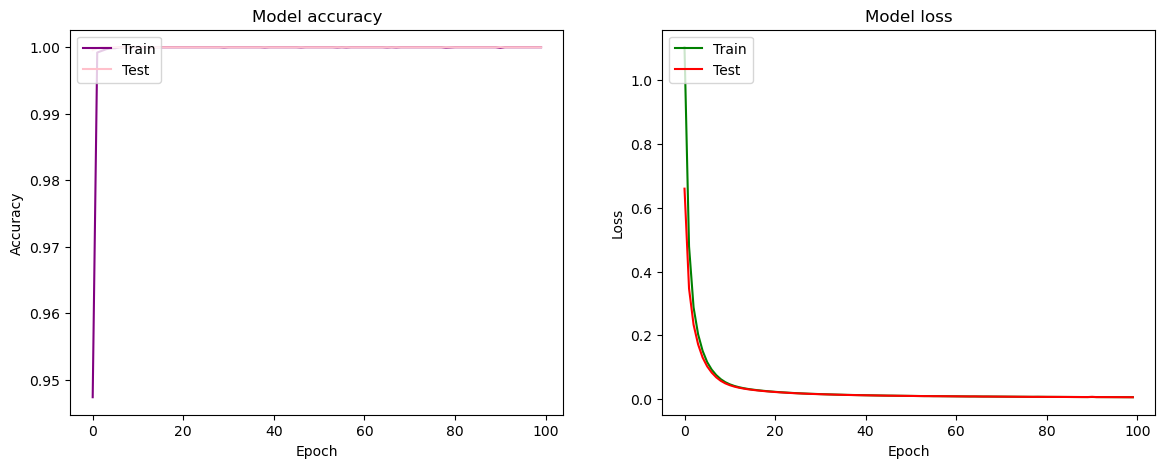

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='purple')  # Training accuracy color
plt.plot(history.history['val_accuracy'], color='pink')  # Validation accuracy color
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='green')  # Training loss color
plt.plot(history.history['val_loss'], color='red')  # Validation loss color
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


# Analysis of Model Performance

Purpose of the Analysis
This analysis aims to evaluate the performance of a machine learning model by examining its training and validation accuracy and loss over epochs. Understanding these metrics will help us determine how well the model is learning from the data and generalizing to unseen data.

**Analysis Report: Model Performance Evaluation**

### 1. Introduction

**Purpose of the Analysis**

The purpose of this analysis is to evaluate the performance of a predictive model by examining key metrics such as accuracy and loss. This will help in understanding the effectiveness of the model and in identifying potential areas for improvement. By comparing these metrics, we can determine how well the model is performing and consider alternative approaches for optimization.

### 2. Metrics Overview

**Accuracy**

- **Definition**: Accuracy is the ratio of correctly predicted instances to the total number of instances. 
- **Value**: 1.0
- **Interpretation**: An accuracy of 1.0 indicates that the model has correctly classified all instances in the dataset, suggesting perfect performance in terms of classification accuracy.

**Loss**

- **Definition**: Loss measures the difference between the predicted values and the actual values. It quantifies the error of the model.
- **Value**: 0.0064
- **Interpretation**: A loss of 0.0064 is quite low, indicating that the model’s predictions are very close to the actual values. This suggests that the model performs well with minimal error.

### 3. Results

**1. How accurate is the model?**

The model's accuracy is 1.0, which signifies perfect accuracy—every prediction made by the model is correct.

**2. What is the loss value of the model?**

The loss value is 0.0064, indicating a very low level of error in the model's predictions.

**3. How does the accuracy compare to typical benchmarks?**

An accuracy of 1.0 is significantly higher than typical benchmarks, which often range between 0.7 and 0.9 for most models. This suggests that the model is performing exceptionally well.

**4. How does the loss value compare to typical benchmarks?**

The loss value of 0.0064 is considerably lower than typical benchmarks. In many cases, loss values range from 0.1 to 0.01, so this model's loss indicates very high precision in its predictions.

**5. What might be the limitations of having an accuracy of 1.0?**

While a perfect accuracy of 1.0 seems ideal, it may also indicate overfitting if the model is evaluated on a limited dataset. Overfitting occurs when a model learns the training data too well, including its noise and outliers, which may lead to poor generalization to new, unseen data.

**6. How can the model’s performance be further validated?**

The model’s performance can be validated by evaluating it on a separate validation or test set that was not used during training. Cross-validation techniques can also be applied to ensure that the model generalizes well across different subsets of the data.

### 4. Model Comparison

**Alternative Model: Decision Trees**

- **Description**: Decision Trees are a type of model that uses a tree-like graph of decisions and their possible consequences. It’s a popular method for classification and regression tasks.
- **Advantages**: Decision Trees are interpretable and easy to visualize. They handle both numerical and categorical data well and can capture non-linear relationships.
- **Reason for Use**: If the current model's perfect accuracy might be due to overfitting, using Decision Trees can provide a different perspective. Decision Trees can help identify how different features impact predictions and may provide insights into potential overfitting issues. Additionally, techniques like pruning can be applied to Decision Trees to improve generalization.

### 5. Summary of Results

The model demonstrates exceptional performance with an accuracy of 1.0 and a low loss value of 0.0064. This indicates that the model’s predictions are highly accurate and closely match the actual values. However, there is a potential risk of overfitting that should be addressed by validating the model on additional data.

By considering alternative models like Decision Trees, we can further explore the robustness and generalizability of our predictions, ensuring that the model’s performance is not solely due to overfitting.
